## Import libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore") 

## List files in the folder

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

## Read files

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


## Multivariate Analysis: initial

In [4]:
train.shape,test.shape

((39499, 15), (10500, 14))

In [5]:
train.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [6]:
test.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,10500.000000,10055.000000,10500.000000,10134.000000,10500.000000,10500.000000,10500.000000
mean,1364.333333,3.897563,2.326571,0.484409,6.361525,120.532571,3.734125
std,1813.702032,2.690162,1.175324,0.749686,1.216237,55.635990,0.793325
min,100.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.020000
25%,505.000000,2.000000,1.000000,0.000000,5.620000,95.000000,3.230000
50%,935.500000,3.000000,2.000000,0.000000,6.470000,113.000000,3.850000
75%,1758.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.220000
max,27477.000000,15.000000,6.000000,3.000000,9.430000,1031.000000,5.000000


In [7]:
train.nunique()

Property_ID               39499
Property_Type                 6
Property_Area              4435
Number_of_Windows            16
Number_of_Doors               6
Furnishing                    3
Frequency_of_Powercuts        4
Power_Backup                  3
Water_Supply                  5
Traffic_Density_Score       772
Crime_Rate                    4
Dust_and_Noise                3
Air_Quality_Index           489
Neighborhood_Review         417
Habitability_score         6105
dtype: int64

In [8]:
train.isna().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [9]:
test.nunique()

Property_ID               10500
Property_Type                 6
Property_Area              2969
Number_of_Windows            16
Number_of_Doors               6
Furnishing                    3
Frequency_of_Powercuts        4
Power_Backup                  3
Water_Supply                  5
Traffic_Density_Score       685
Crime_Rate                    4
Dust_and_Noise                3
Air_Quality_Index           274
Neighborhood_Review         375
dtype: int64

In [10]:
train.dtypes

Property_ID                object
Property_Type              object
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Furnishing                 object
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

In [11]:
test.isna().sum()

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

In [12]:
train.columns

Index(['Property_ID', 'Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score'],
      dtype='object')

Count :  39499
Nunique :  6
Null Sum :  0
Uniques :  ['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64


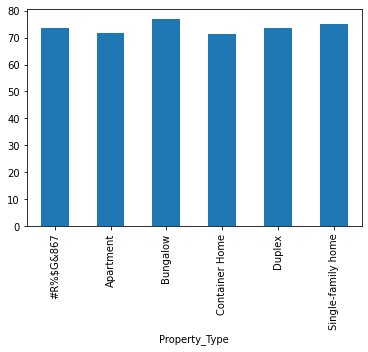

_________________________________________________________________________________________
Count :  39499
Nunique :  4435
Null Sum :  0
Average :  1391.7156383705917
Dist plot for  Property_Area


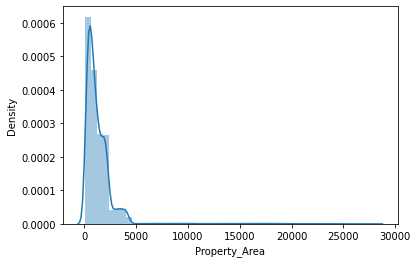

_________________________________________________________________________________________
Count :  37845
Nunique :  16
Null Sum :  1654
Average :  3.923768001056943
Dist plot for  Number_of_Windows


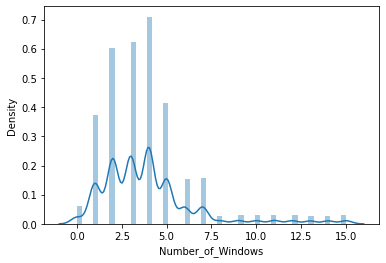

_________________________________________________________________________________________
Count :  39499
Nunique :  6
Null Sum :  0
Average :  2.331375477860199
Dist plot for  Number_of_Doors


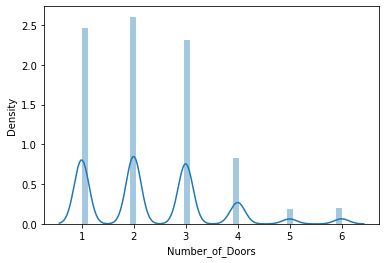

_________________________________________________________________________________________
Count :  38457
Nunique :  3
Null Sum :  1042
Uniques :  ['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64


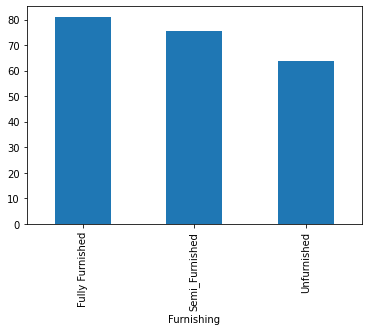

_________________________________________________________________________________________
Count :  38116
Nunique :  4
Null Sum :  1383
Average :  0.484678350299087
Dist plot for  Frequency_of_Powercuts


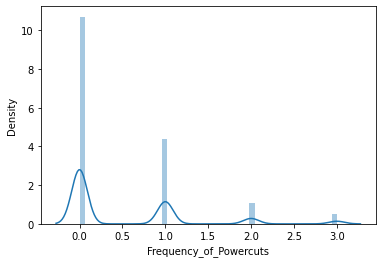

_________________________________________________________________________________________
Count :  39499
Nunique :  3
Null Sum :  0
Uniques :  ['No' 'Yes' 'NOT MENTIONED']
No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64


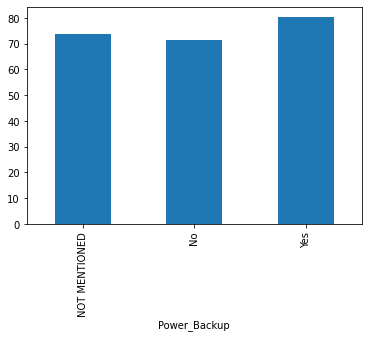

_________________________________________________________________________________________
Count :  39499
Nunique :  5
Null Sum :  0
Uniques :  ['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64


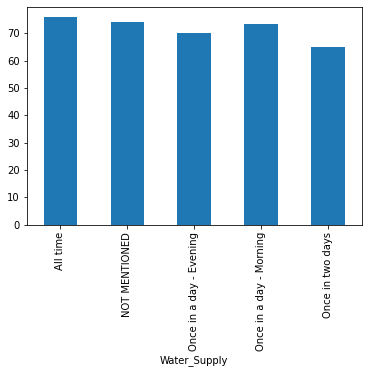

_________________________________________________________________________________________
Count :  39499
Nunique :  772
Null Sum :  0
Average :  6.3547717663738315
Dist plot for  Traffic_Density_Score


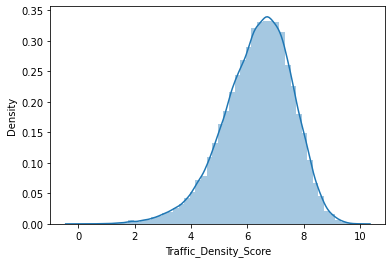

_________________________________________________________________________________________
Count :  38712
Nunique :  4
Null Sum :  787
Uniques :  ['Slightly below average' 'Well below average' 'Well above average' nan
 'Slightly above average']
Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64


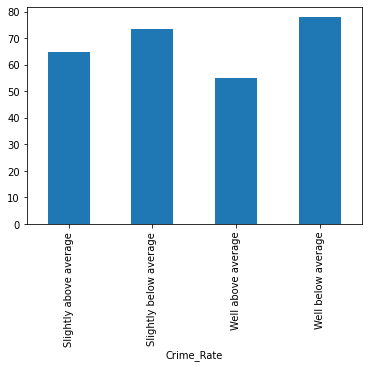

_________________________________________________________________________________________
Count :  38280
Nunique :  3
Null Sum :  1219
Uniques :  ['Medium' nan 'High' 'Low']
Medium    32996
High       3212
Low        2072
Name: Dust_and_Noise, dtype: int64


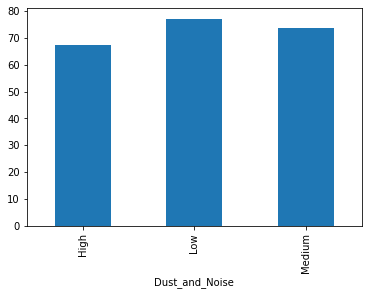

_________________________________________________________________________________________
Count :  39499
Nunique :  489
Null Sum :  0
Average :  121.35256588774399
Dist plot for  Air_Quality_Index


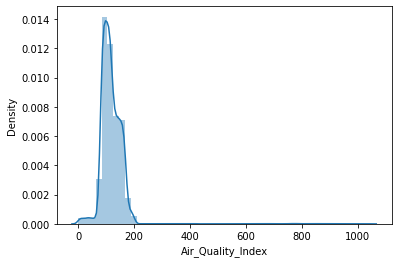

_________________________________________________________________________________________
Count :  39499
Nunique :  417
Null Sum :  0
Average :  3.7359452138028812
Dist plot for  Neighborhood_Review


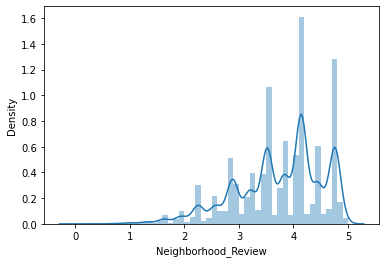

_________________________________________________________________________________________
Count :  39499
Nunique :  6105
Null Sum :  0
Average :  73.48229676700676
Dist plot for  Habitability_score


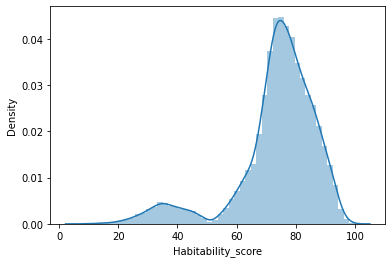

_________________________________________________________________________________________


In [13]:
for i in ['Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score']:
    print("Count : ",train[i].count())
    print("Nunique : ",train[i].nunique())
    print("Null Sum : ",train[i].isna().sum())
    if(train[i].dtypes == 'int64' or train[i].dtypes == 'float64'):
        print("Average : ",train[i].sum()/train[i].count())
        print("Dist plot for ",i)        
        sns.distplot(train[i])
        plt.show()
    if(train[i].dtypes == 'object'):
        print("Uniques : ",train[i].unique())
        print(train[i].value_counts())
        train.groupby(i)['Habitability_score'].mean().plot(kind='bar')
        plt.show()
    print("_________________________________________________________________________________________")

In [14]:
train.Dust_and_Noise.astype(str).value_counts()

Medium    32996
High       3212
Low        2072
nan        1219
Name: Dust_and_Noise, dtype: int64

## Column wise EDA (Univariate Analysis)

### 1. Property_Type

In [15]:
train['Property_Type'].nunique()

6

In [16]:
train.groupby("Property_Type")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Property_Type,,,,,,
#R%$G&867,17.81,95.65,73.546098,75.755,37508.51,510
Apartment,7.28,98.18,71.729413,74.715,1046962.51,14596
Bungalow,13.03,99.59,76.877683,77.690,325807.62,4238
Container Home,14.27,98.01,71.290373,74.340,204745.95,2872
Duplex,10.85,99.45,73.715543,75.970,427992.44,5806
Single-family home,9.00,100.00,74.885441,76.410,859460.21,11477


<AxesSubplot:xlabel='Property_Type'>

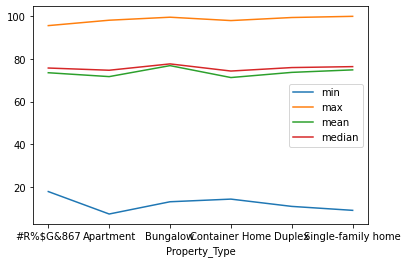

In [17]:
train.groupby("Property_Type")['Habitability_score'].agg(['min','max','mean','median']).plot()

<AxesSubplot:xlabel='Property_Type', ylabel='Habitability_score'>

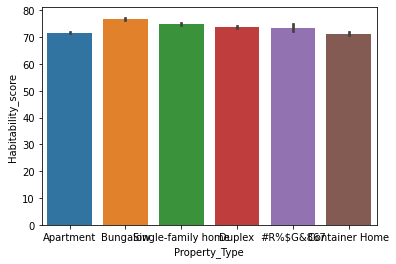

In [18]:
sns.barplot('Property_Type','Habitability_score',data = train)

<AxesSubplot:xlabel='Property_Type', ylabel='count'>

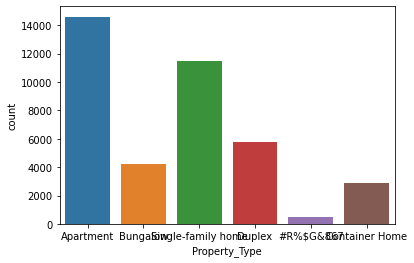

In [19]:
sns.countplot(train.Property_Type)

### 2. Property_Area

In [20]:
train['Property_Area'].nunique()

4435

In [21]:
train['Property_Area'].describe()

count    39499.000000
mean      1391.715638
std       1953.287544
min        100.000000
25%        494.000000
50%        932.000000
75%       1770.000000
max      28064.000000
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Habitability_score', ylabel='Property_Area'>

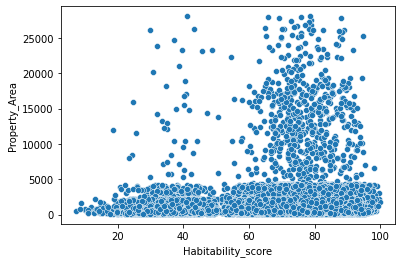

In [22]:
sns.scatterplot('Habitability_score','Property_Area',data = train)

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

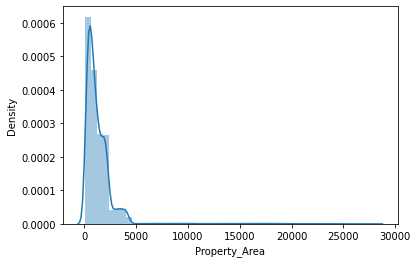

In [23]:
sns.distplot(train['Property_Area'])

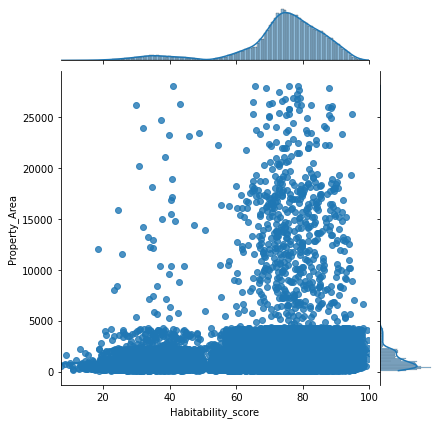

In [24]:
sns.jointplot('Habitability_score','Property_Area',data = train,kind='reg')

<AxesSubplot:xlabel='Habitability_score', ylabel='Property_Area'>

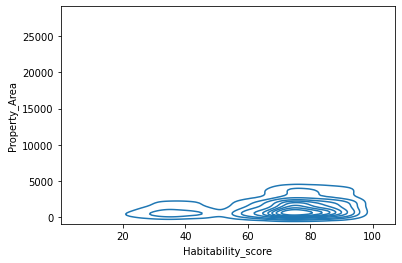

In [25]:
sns.kdeplot('Habitability_score','Property_Area',data = train,kind='reg')

<AxesSubplot:xlabel='Property_Area'>

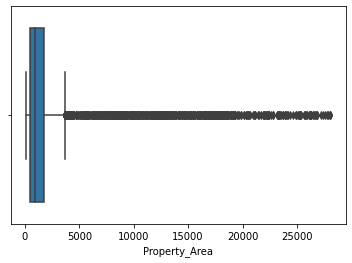

In [26]:
sns.boxplot(train['Property_Area'])

<AxesSubplot:xlabel='Property_Area', ylabel='Habitability_score'>

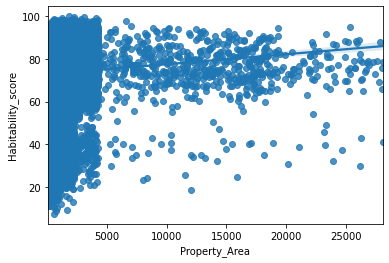

In [27]:
sns.regplot(train['Property_Area'],train['Habitability_score'])

### 3. Number_of_Windows

In [28]:
train['Number_of_Windows'].nunique()

16

In [29]:
train['Number_of_Windows'].value_counts()

4.0     8053
3.0     7080
2.0     6857
5.0     4708
1.0     4254
7.0     1784
6.0     1738
0.0      699
11.0     363
9.0      352
15.0     336
12.0     336
10.0     335
8.0      326
14.0     316
13.0     308
Name: Number_of_Windows, dtype: int64

In [30]:
train.groupby("Number_of_Windows")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Number_of_Windows,,,,,,
0.0,14.28,95.18,71.115651,74.300,49709.84,699
1.0,8.52,96.56,71.248973,74.520,303093.13,4254
2.0,9.94,98.35,73.142466,75.690,501537.89,6857
3.0,12.58,98.58,72.812123,75.305,515509.83,7080
4.0,7.28,99.55,73.261643,75.530,589976.01,8053
5.0,10.85,100.00,74.714911,76.245,351757.80,4708
6.0,11.77,98.23,74.469229,76.390,129427.52,1738
7.0,13.03,98.87,74.819613,76.880,133478.19,1784
8.0,22.61,98.11,76.281994,77.900,24867.93,326


<AxesSubplot:xlabel='Number_of_Windows'>

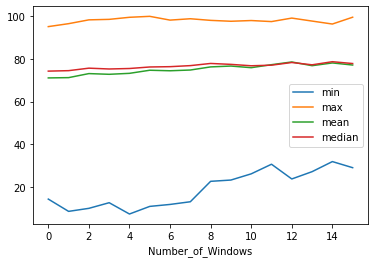

In [31]:
train.groupby("Number_of_Windows")['Habitability_score'].agg(['min','max','mean','median']).plot()

<AxesSubplot:xlabel='Number_of_Windows', ylabel='Habitability_score'>

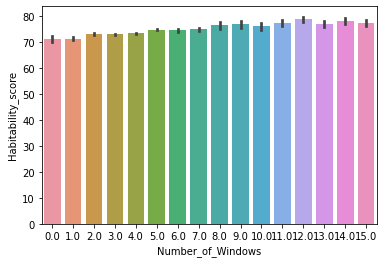

In [32]:
sns.barplot('Number_of_Windows','Habitability_score',data = train)

<AxesSubplot:xlabel='Number_of_Windows', ylabel='count'>

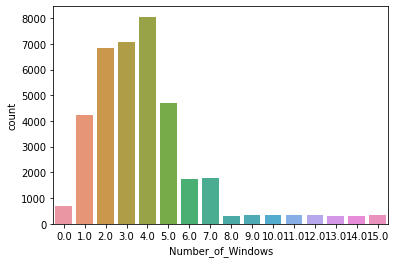

In [33]:
sns.countplot(train.Number_of_Windows)

### 4. Number_of_Doors

In [34]:
train['Number_of_Doors'].nunique()

6

In [35]:
train['Number_of_Doors'].value_counts()

2    11958
1    11337
3    10647
4     3789
6      897
5      871
Name: Number_of_Doors, dtype: int64

In [36]:
train.groupby("Number_of_Doors")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Number_of_Doors,,,,,,
1,10.85,98.58,72.681231,75.20,823987.12,11337
2,7.28,100.00,73.093228,75.51,874048.82,11958
3,8.52,99.55,73.462614,75.77,782156.45,10647
4,13.03,98.24,75.401127,76.91,285694.87,3789
5,22.32,99.59,76.533100,77.51,66660.33,871
6,20.98,99.18,77.959476,78.08,69929.65,897


<AxesSubplot:xlabel='Number_of_Doors'>

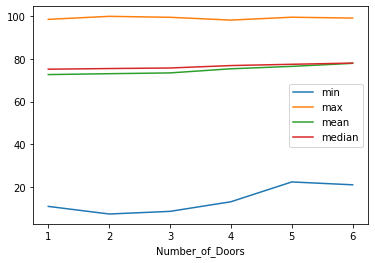

In [37]:
train.groupby("Number_of_Doors")['Habitability_score'].agg(['min','max','mean','median']).plot()

<AxesSubplot:xlabel='Number_of_Doors', ylabel='Habitability_score'>

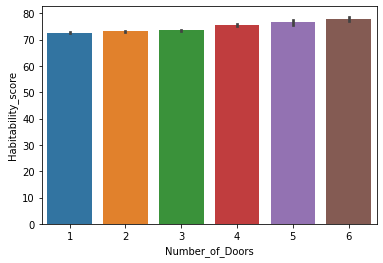

In [38]:
sns.barplot('Number_of_Doors','Habitability_score',data = train)

<AxesSubplot:xlabel='Number_of_Doors', ylabel='count'>

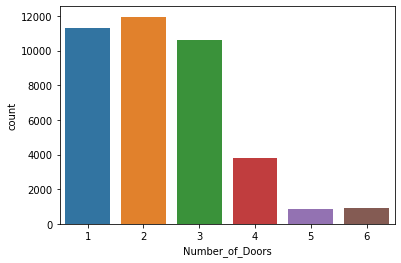

In [39]:
sns.countplot(train.Number_of_Doors)

### 5. Furnishing

In [40]:
train['Furnishing'].nunique()

3

In [41]:
train['Furnishing'].value_counts()

Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64

In [42]:
train.groupby("Furnishing")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Furnishing,,,,,,
Fully Furnished,26.51,100.00,81.065201,80.945,628741.70,7756
Semi_Furnished,16.76,97.84,75.478654,76.300,1536518.96,20357
Unfurnished,7.28,95.71,63.857112,69.280,660537.97,10344


<AxesSubplot:xlabel='Furnishing'>

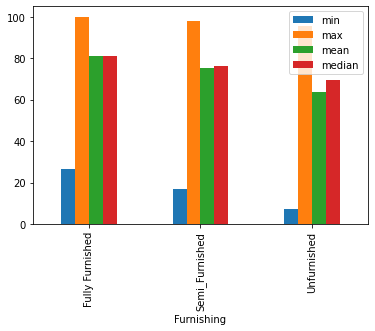

In [43]:
train.groupby("Furnishing")['Habitability_score'].agg(['min','max','mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Furnishing', ylabel='Habitability_score'>

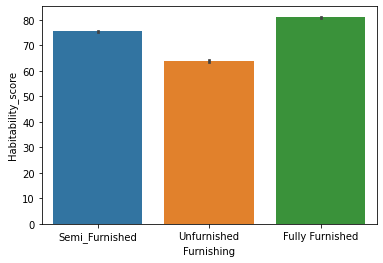

In [44]:
sns.barplot('Furnishing','Habitability_score',data = train)

<AxesSubplot:xlabel='Furnishing', ylabel='count'>

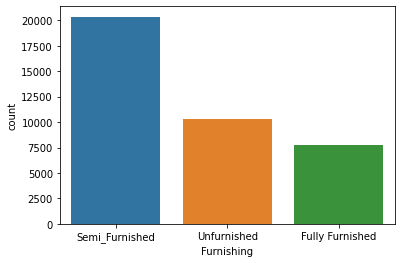

In [45]:
sns.countplot(train.Furnishing)

### 6. Frequency_of_Powercuts


In [46]:
train['Frequency_of_Powercuts'].nunique()

4

In [47]:
train['Frequency_of_Powercuts'].value_counts()

0.0    24471
1.0    10010
2.0     2441
3.0     1194
Name: Frequency_of_Powercuts, dtype: int64

In [48]:
train.groupby("Frequency_of_Powercuts")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Frequency_of_Powercuts,,,,,,
0.0,10.85,100.00,75.483540,76.70,1847157.71,24471
1.0,7.28,98.19,71.716998,74.78,717887.15,10010
2.0,12.81,96.19,66.648513,72.27,162689.02,2441
3.0,8.52,96.02,61.251256,68.50,73134.00,1194


<AxesSubplot:xlabel='Frequency_of_Powercuts'>

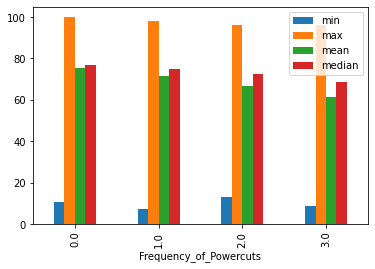

In [49]:
train.groupby("Frequency_of_Powercuts")['Habitability_score'].agg(['min','max','mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Frequency_of_Powercuts', ylabel='Habitability_score'>

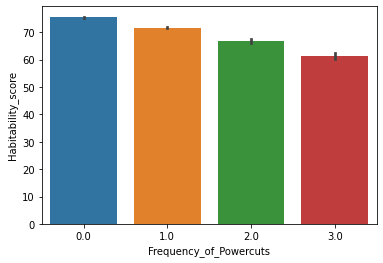

In [50]:
sns.barplot('Frequency_of_Powercuts','Habitability_score',data = train)

<AxesSubplot:xlabel='Frequency_of_Powercuts', ylabel='count'>

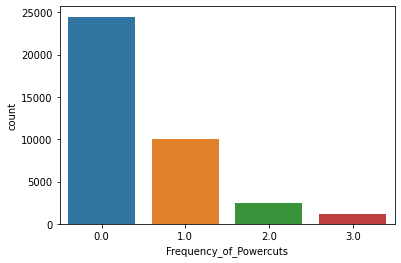

In [51]:
sns.countplot(train.Frequency_of_Powercuts)

### 7. Power_Backup

In [52]:
train['Power_Backup'].nunique()

3

In [53]:
train['Power_Backup'].value_counts()

No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64

In [54]:
train.groupby("Power_Backup")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Power_Backup,,,,,,
NOT MENTIONED,10.88,96.84,73.756304,75.565,61070.22,828
No,7.28,97.83,71.396196,74.340,2121466.56,29714
Yes,16.95,100.00,80.377410,80.540,719940.46,8957


<AxesSubplot:xlabel='Power_Backup'>

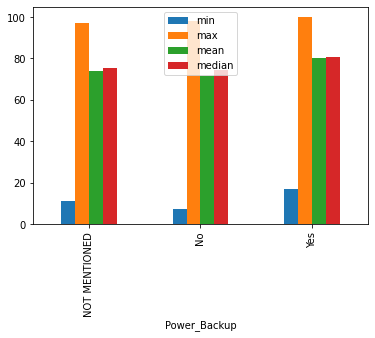

In [55]:
train.groupby("Power_Backup")['Habitability_score'].agg(['min','max','mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Power_Backup', ylabel='Habitability_score'>

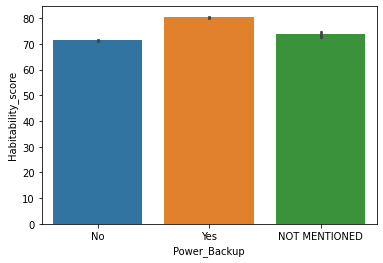

In [56]:
sns.barplot('Power_Backup','Habitability_score',data = train)

<AxesSubplot:xlabel='Power_Backup', ylabel='count'>

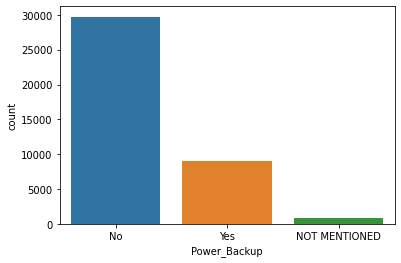

In [57]:
sns.countplot(train.Power_Backup)

### 8. Water_Supply

In [58]:
train['Water_Supply'].nunique()

5

In [59]:
train['Water_Supply'].value_counts()

All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64

In [60]:
train.groupby("Water_Supply")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Water_Supply,,,,,,
All time,13.93,100.00,75.792935,77.00,1478795.96,19511
NOT MENTIONED,15.02,97.78,73.990667,77.05,25526.78,345
Once in a day - Evening,7.28,97.97,70.179611,73.93,548453.66,7815
Once in a day - Morning,11.77,98.52,73.209474,75.42,724554.16,9897
Once in two days,9.94,96.66,64.809259,71.08,125146.68,1931


<AxesSubplot:xlabel='Water_Supply'>

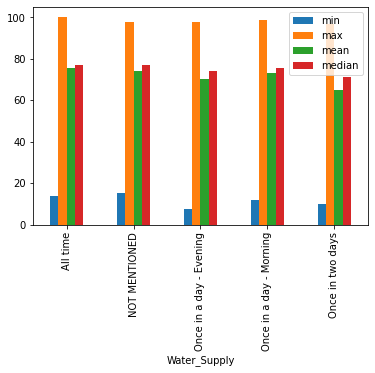

In [61]:
train.groupby("Water_Supply")['Habitability_score'].agg(['min','max','mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Water_Supply', ylabel='Habitability_score'>

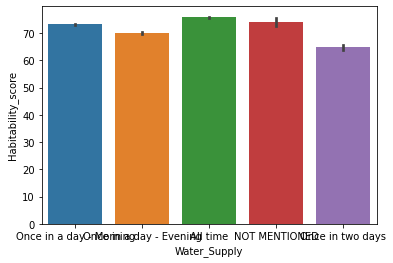

In [62]:
sns.barplot('Water_Supply','Habitability_score',data = train)

<AxesSubplot:xlabel='Water_Supply', ylabel='count'>

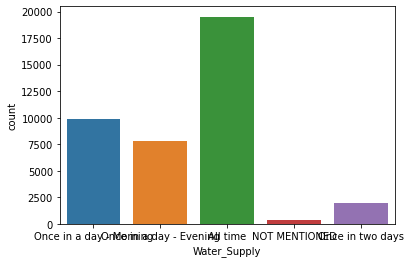

In [63]:
sns.countplot(train.Water_Supply)

### 9. Traffic_Density_Score

In [64]:
train['Traffic_Density_Score'].nunique()

772

In [65]:
train['Traffic_Density_Score'].describe()

count    39499.000000
mean         6.354772
std          1.219681
min          0.000000
25%          5.600000
50%          6.470000
75%          7.220000
max          9.910000
Name: Traffic_Density_Score, dtype: float64

<AxesSubplot:xlabel='Habitability_score', ylabel='Traffic_Density_Score'>

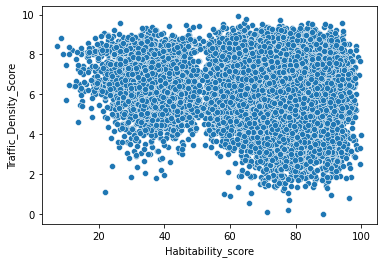

In [66]:
sns.scatterplot('Habitability_score','Traffic_Density_Score',data = train)

<AxesSubplot:xlabel='Traffic_Density_Score', ylabel='Density'>

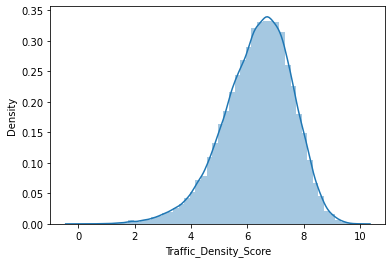

In [67]:
sns.distplot(train['Traffic_Density_Score'])

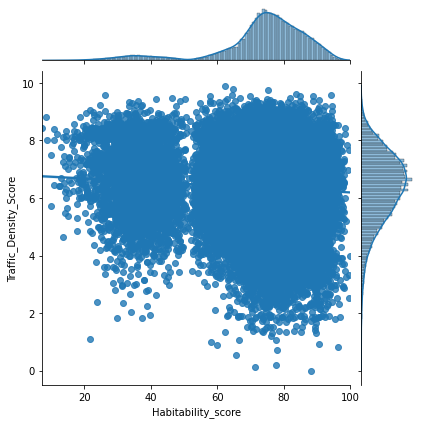

In [68]:
sns.jointplot('Habitability_score','Traffic_Density_Score',data = train,kind='reg')

<AxesSubplot:xlabel='Habitability_score', ylabel='Traffic_Density_Score'>

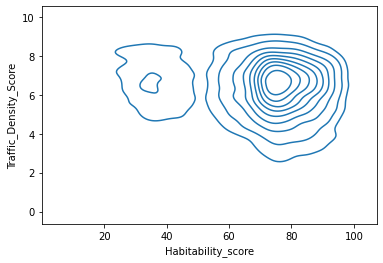

In [69]:
sns.kdeplot('Habitability_score','Traffic_Density_Score',data = train,kind='reg')

<AxesSubplot:xlabel='Traffic_Density_Score'>

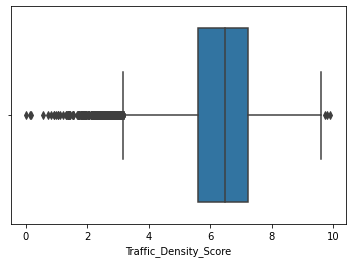

In [70]:
sns.boxplot(train['Traffic_Density_Score'])

<AxesSubplot:xlabel='Traffic_Density_Score', ylabel='Habitability_score'>

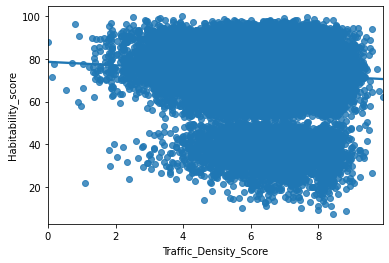

In [71]:
sns.regplot('Traffic_Density_Score','Habitability_score',data = train)

### 10. Crime_Rate

In [72]:
train['Crime_Rate'].nunique()

4

In [73]:
train['Crime_Rate'].value_counts()

Well below average        19472
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64

In [74]:
train.groupby("Crime_Rate")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Crime_Rate,,,,,,
Slightly above average,8.52,96.74,64.952978,70.12,344445.64,5303
Slightly below average,14.40,98.52,73.556079,75.44,851779.40,11580
Well above average,7.28,95.30,55.011052,60.76,129661.05,2357
Well below average,21.78,100.00,78.013276,77.96,1519074.51,19472


<AxesSubplot:xlabel='Crime_Rate'>

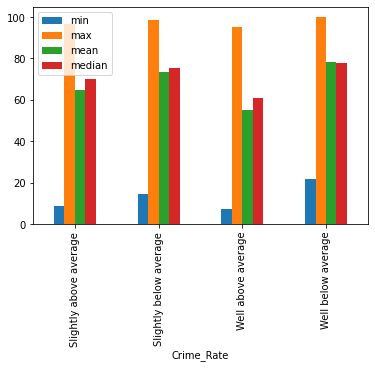

In [75]:
train.groupby("Crime_Rate")['Habitability_score'].agg(['min','max','mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Crime_Rate', ylabel='Habitability_score'>

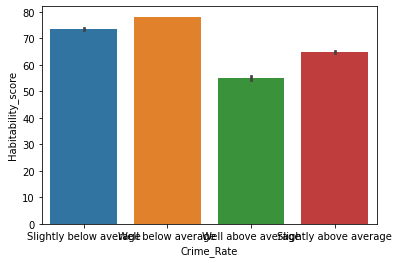

In [76]:
sns.barplot('Crime_Rate','Habitability_score',data = train)

<AxesSubplot:xlabel='Crime_Rate', ylabel='count'>

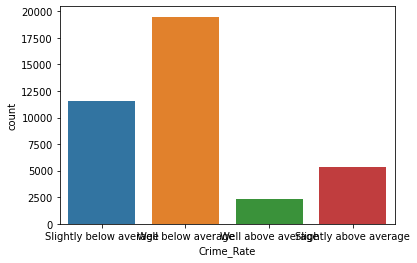

In [77]:
sns.countplot(train.Crime_Rate)

### 11. Dust_and_Noise

In [78]:
train['Dust_and_Noise'].nunique()

3

In [79]:
train['Dust_and_Noise'].value_counts()

Medium    32996
High       3212
Low        2072
Name: Dust_and_Noise, dtype: int64

In [80]:
train.groupby("Dust_and_Noise")['Habitability_score'].agg(['min','max','mean','median','sum','count'])

,min,max,mean,median,sum,count
Dust_and_Noise,,,,,,
High,7.28,98.30,67.291600,72.57,216140.62,3212
Low,21.91,100.00,77.115536,77.82,159783.39,2072
Medium,9.94,99.59,73.868511,75.89,2437365.38,32996


<AxesSubplot:xlabel='Dust_and_Noise'>

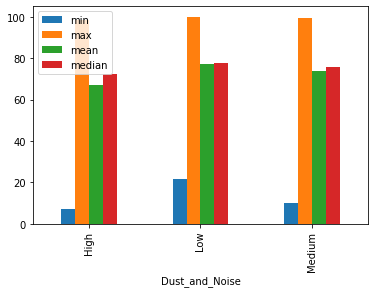

In [81]:
train.groupby("Dust_and_Noise")['Habitability_score'].agg(['min','max','mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Dust_and_Noise', ylabel='Habitability_score'>

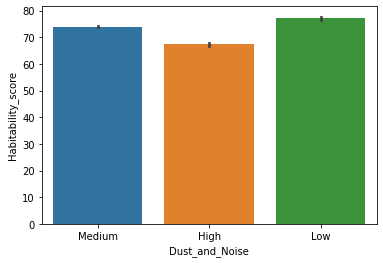

In [82]:
sns.barplot('Dust_and_Noise','Habitability_score',data = train)

<AxesSubplot:xlabel='Dust_and_Noise', ylabel='count'>

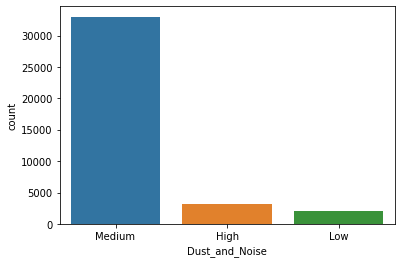

In [83]:
sns.countplot(train.Dust_and_Noise)

### 12. Air_Quality_Index

In [84]:
train['Air_Quality_Index'].nunique()

489

In [85]:
train['Air_Quality_Index'].describe()

count    39499.000000
mean       121.352566
std         62.384669
min          0.000000
25%         95.000000
50%        113.000000
75%        140.000000
max       1044.000000
Name: Air_Quality_Index, dtype: float64

<AxesSubplot:xlabel='Habitability_score', ylabel='Air_Quality_Index'>

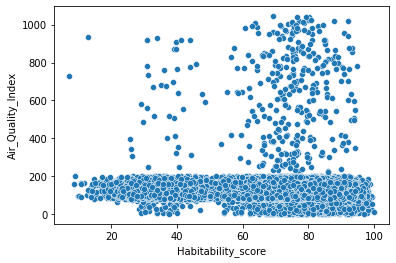

In [86]:
sns.scatterplot('Habitability_score','Air_Quality_Index',data = train)

<AxesSubplot:xlabel='Air_Quality_Index', ylabel='Density'>

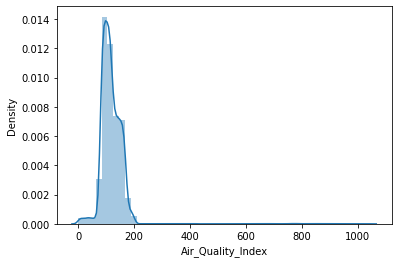

In [87]:
sns.distplot(train['Air_Quality_Index'])

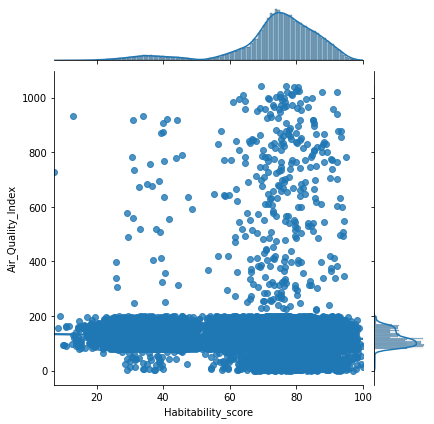

In [88]:
sns.jointplot('Habitability_score','Air_Quality_Index',data = train,kind='reg')

<AxesSubplot:xlabel='Habitability_score', ylabel='Air_Quality_Index'>

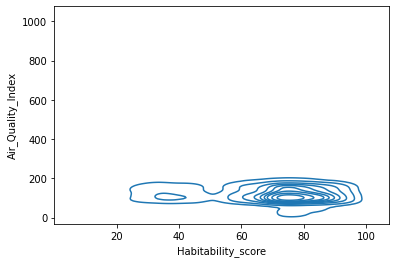

In [89]:
sns.kdeplot('Habitability_score','Air_Quality_Index',data = train,kind='reg')

<AxesSubplot:xlabel='Air_Quality_Index'>

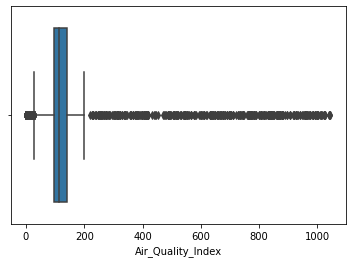

In [90]:
sns.boxplot(train['Air_Quality_Index'])

<AxesSubplot:xlabel='Air_Quality_Index', ylabel='Habitability_score'>

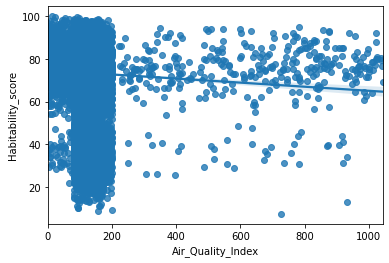

In [91]:
sns.regplot('Air_Quality_Index','Habitability_score',data = train)

### 13. Neighborhood_Review

In [92]:
train['Neighborhood_Review'].nunique()

417

In [93]:
train['Neighborhood_Review'].describe()

count    39499.000000
mean         3.735945
std          0.796843
min          0.000000
25%          3.220000
50%          3.850000
75%          4.260000
max          5.000000
Name: Neighborhood_Review, dtype: float64

<AxesSubplot:xlabel='Habitability_score', ylabel='Neighborhood_Review'>

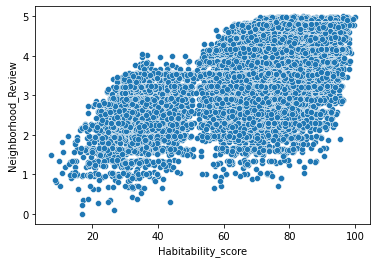

In [94]:
sns.scatterplot('Habitability_score','Neighborhood_Review',data = train)

<AxesSubplot:xlabel='Neighborhood_Review', ylabel='Density'>

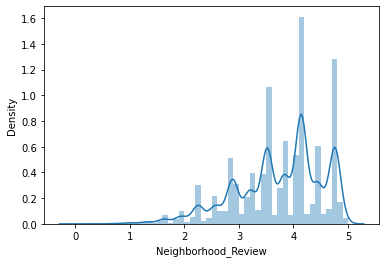

In [95]:
sns.distplot(train['Neighborhood_Review'])

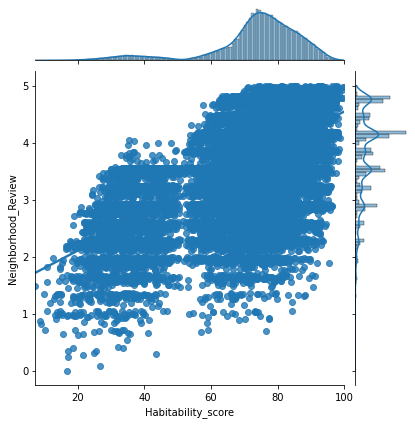

In [96]:
sns.jointplot('Habitability_score','Neighborhood_Review',data = train,kind='reg')

<AxesSubplot:xlabel='Habitability_score', ylabel='Neighborhood_Review'>

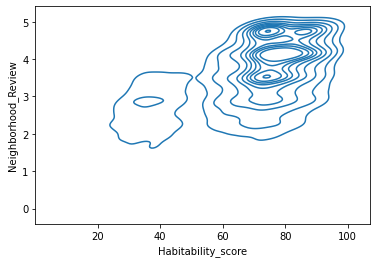

In [97]:
sns.kdeplot('Habitability_score','Neighborhood_Review',data = train,kind='reg')

<AxesSubplot:xlabel='Neighborhood_Review'>

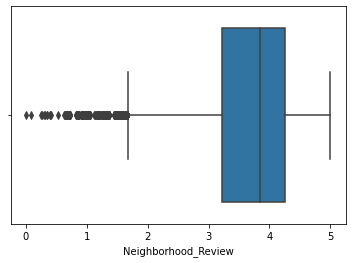

In [98]:
sns.boxplot(train['Neighborhood_Review'])

<AxesSubplot:xlabel='Neighborhood_Review', ylabel='Habitability_score'>

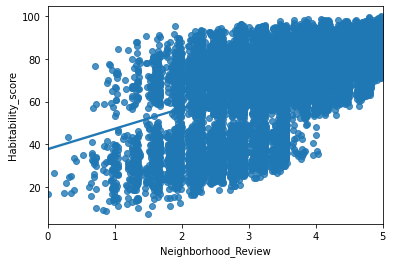

In [99]:
sns.regplot('Neighborhood_Review','Habitability_score',data = train)

### 14. Habitability_score

In [100]:
train['Habitability_score'].nunique()

6105

In [101]:
train['Habitability_score'].describe()

count    39499.000000
mean        73.482297
std         14.118753
min          7.280000
25%         69.660000
50%         75.760000
75%         82.260000
max        100.000000
Name: Habitability_score, dtype: float64

<AxesSubplot:xlabel='Habitability_score', ylabel='Habitability_score'>

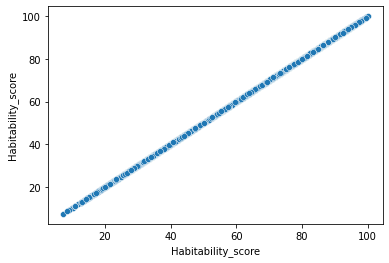

In [102]:
sns.scatterplot('Habitability_score','Habitability_score',data = train)

<AxesSubplot:xlabel='Habitability_score', ylabel='Density'>

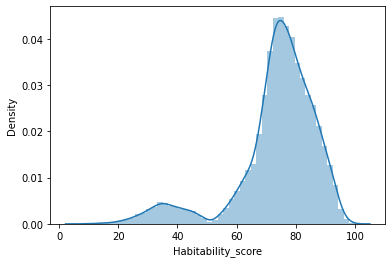

In [103]:
sns.distplot(train['Habitability_score'])

<AxesSubplot:xlabel='Habitability_score'>

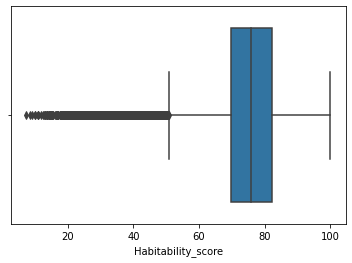

In [104]:
sns.boxplot(train['Habitability_score'])

## Map the categorical columns

In [105]:
def map_data(df,name):
    mapdata = {}
    for i,j in zip(df[name].astype(str).unique(),range(df[name].astype(str).nunique())):
        mapdata[i]=j
    return mapdata

In [106]:
for i in ['Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score']:
    if(train[i].dtypes == 'object' and train[i].nunique()<20):
        print("------------------------------------------------ name is : ", i)
        print("Before update")
        print(train[i].unique())
        print("______")
        print(train[i].astype(str).value_counts())
        print("______")
        mapping_data = map_data(train,i)
        train[i] = train[i].astype(str).map(mapping_data)
        test[i] = test[i].astype(str).map(mapping_data)
        print("After update")
        print(train[i].unique())

------------------------------------------------ name is :  Property_Type
Before update
['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
______
Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64
______
After update
[0 1 2 3 4 5]
------------------------------------------------ name is :  Furnishing
Before update
['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
______
Semi_Furnished     20357
Unfurnished        10344
Fully Furnished     7756
nan                 1042
Name: Furnishing, dtype: int64
______
After update
[0 1 2 3]
------------------------------------------------ name is :  Power_Backup
Before update
['No' 'Yes' 'NOT MENTIONED']
______
No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64
______
After update
[0 1 2]
-----------------------

In [107]:
for i in ['Number_of_Windows','Frequency_of_Powercuts']:
        print("------------------------------------------------ name is : ", i)
        print("Before update")
        print(train[i].unique())
        print("______")
        print(train[i].astype(str).value_counts())
        print("______")
        mapping_data = map_data(train,i)
        train[i] = train[i].astype(str).map(mapping_data)
        test[i] = test[i].astype(str).map(mapping_data)
        print("After update")
        print(train[i].unique())

------------------------------------------------ name is :  Number_of_Windows
Before update
[nan  2.  4.  3. 14.  5.  1. 13.  6.  7.  9. 15. 11. 12.  0.  8. 10.]
______
4.0     8053
3.0     7080
2.0     6857
5.0     4708
1.0     4254
7.0     1784
6.0     1738
nan     1654
0.0      699
11.0     363
9.0      352
15.0     336
12.0     336
10.0     335
8.0      326
14.0     316
13.0     308
Name: Number_of_Windows, dtype: int64
______
After update
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
------------------------------------------------ name is :  Frequency_of_Powercuts
Before update
[ 0.  1.  2.  3. nan]
______
0.0    24471
1.0    10010
2.0     2441
nan     1383
3.0     1194
Name: Frequency_of_Powercuts, dtype: int64
______
After update
[0 1 2 3 4]


## CORR

In [108]:
train[['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review','Habitability_score' ]].corr()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_Type,1.000000,0.018481,0.193395,-0.096534,-0.000186,-0.001633,0.000458,0.001018,-0.001071,-0.003277,0.008971,-0.003538,0.007516,0.023187
Property_Area,0.018481,1.000000,0.136105,0.219825,0.007776,-0.010898,0.006543,0.008050,0.000139,-0.010139,-0.000099,0.003673,0.013294,0.065079
Number_of_Windows,0.193395,0.136105,1.000000,0.201551,0.009985,-0.000008,-0.001339,0.008104,0.000430,-0.004278,0.001981,-0.000956,0.007513,0.035558
Number_of_Doors,-0.096534,0.219825,0.201551,1.000000,0.009266,-0.004874,0.008090,0.007899,-0.001824,-0.004213,0.000497,0.002055,-0.004360,0.072108
Furnishing,-0.000186,0.007776,0.009985,0.009266,1.000000,0.008295,-0.001271,-0.014819,0.002948,-0.001709,0.003947,-0.004403,-0.004065,0.038177
Frequency_of_Powercuts,-0.001633,-0.010898,-0.000008,-0.004874,0.008295,1.000000,-0.001277,-0.001687,-0.006330,-0.000349,0.007587,-0.009551,-0.437836,-0.173385
Power_Backup,0.000458,0.006543,-0.001339,0.008090,-0.001271,-0.001277,1.000000,-0.002683,-0.006991,0.005072,-0.007087,0.002318,-0.005867,0.228473
Water_Supply,0.001018,0.008050,0.008104,0.007899,-0.014819,-0.001687,-0.002683,1.000000,0.004650,0.008155,0.008638,0.007361,0.041290,-0.003685
Traffic_Density_Score,-0.001071,0.000139,0.000430,-0.001824,0.002948,-0.006330,-0.006991,0.004650,1.000000,0.114342,-0.073421,0.300867,-0.017424,-0.070289
Crime_Rate,-0.003277,-0.010139,-0.004278,-0.004213,-0.001709,-0.000349,0.005072,0.008155,0.114342,1.000000,0.079581,0.039550,-0.359639,-0.256414


<AxesSubplot:>

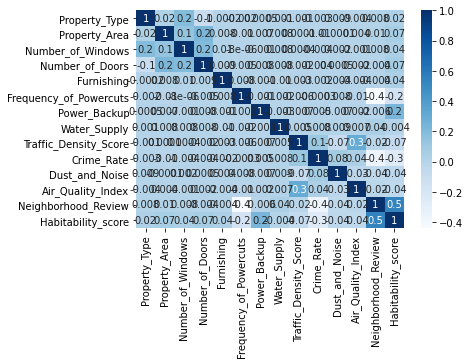

In [109]:
sns.heatmap(train[['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review','Habitability_score' ]].corr(),cmap="Blues",fmt='.1g',annot=True)
sns.set(rc={'figure.figsize':(20,20)})

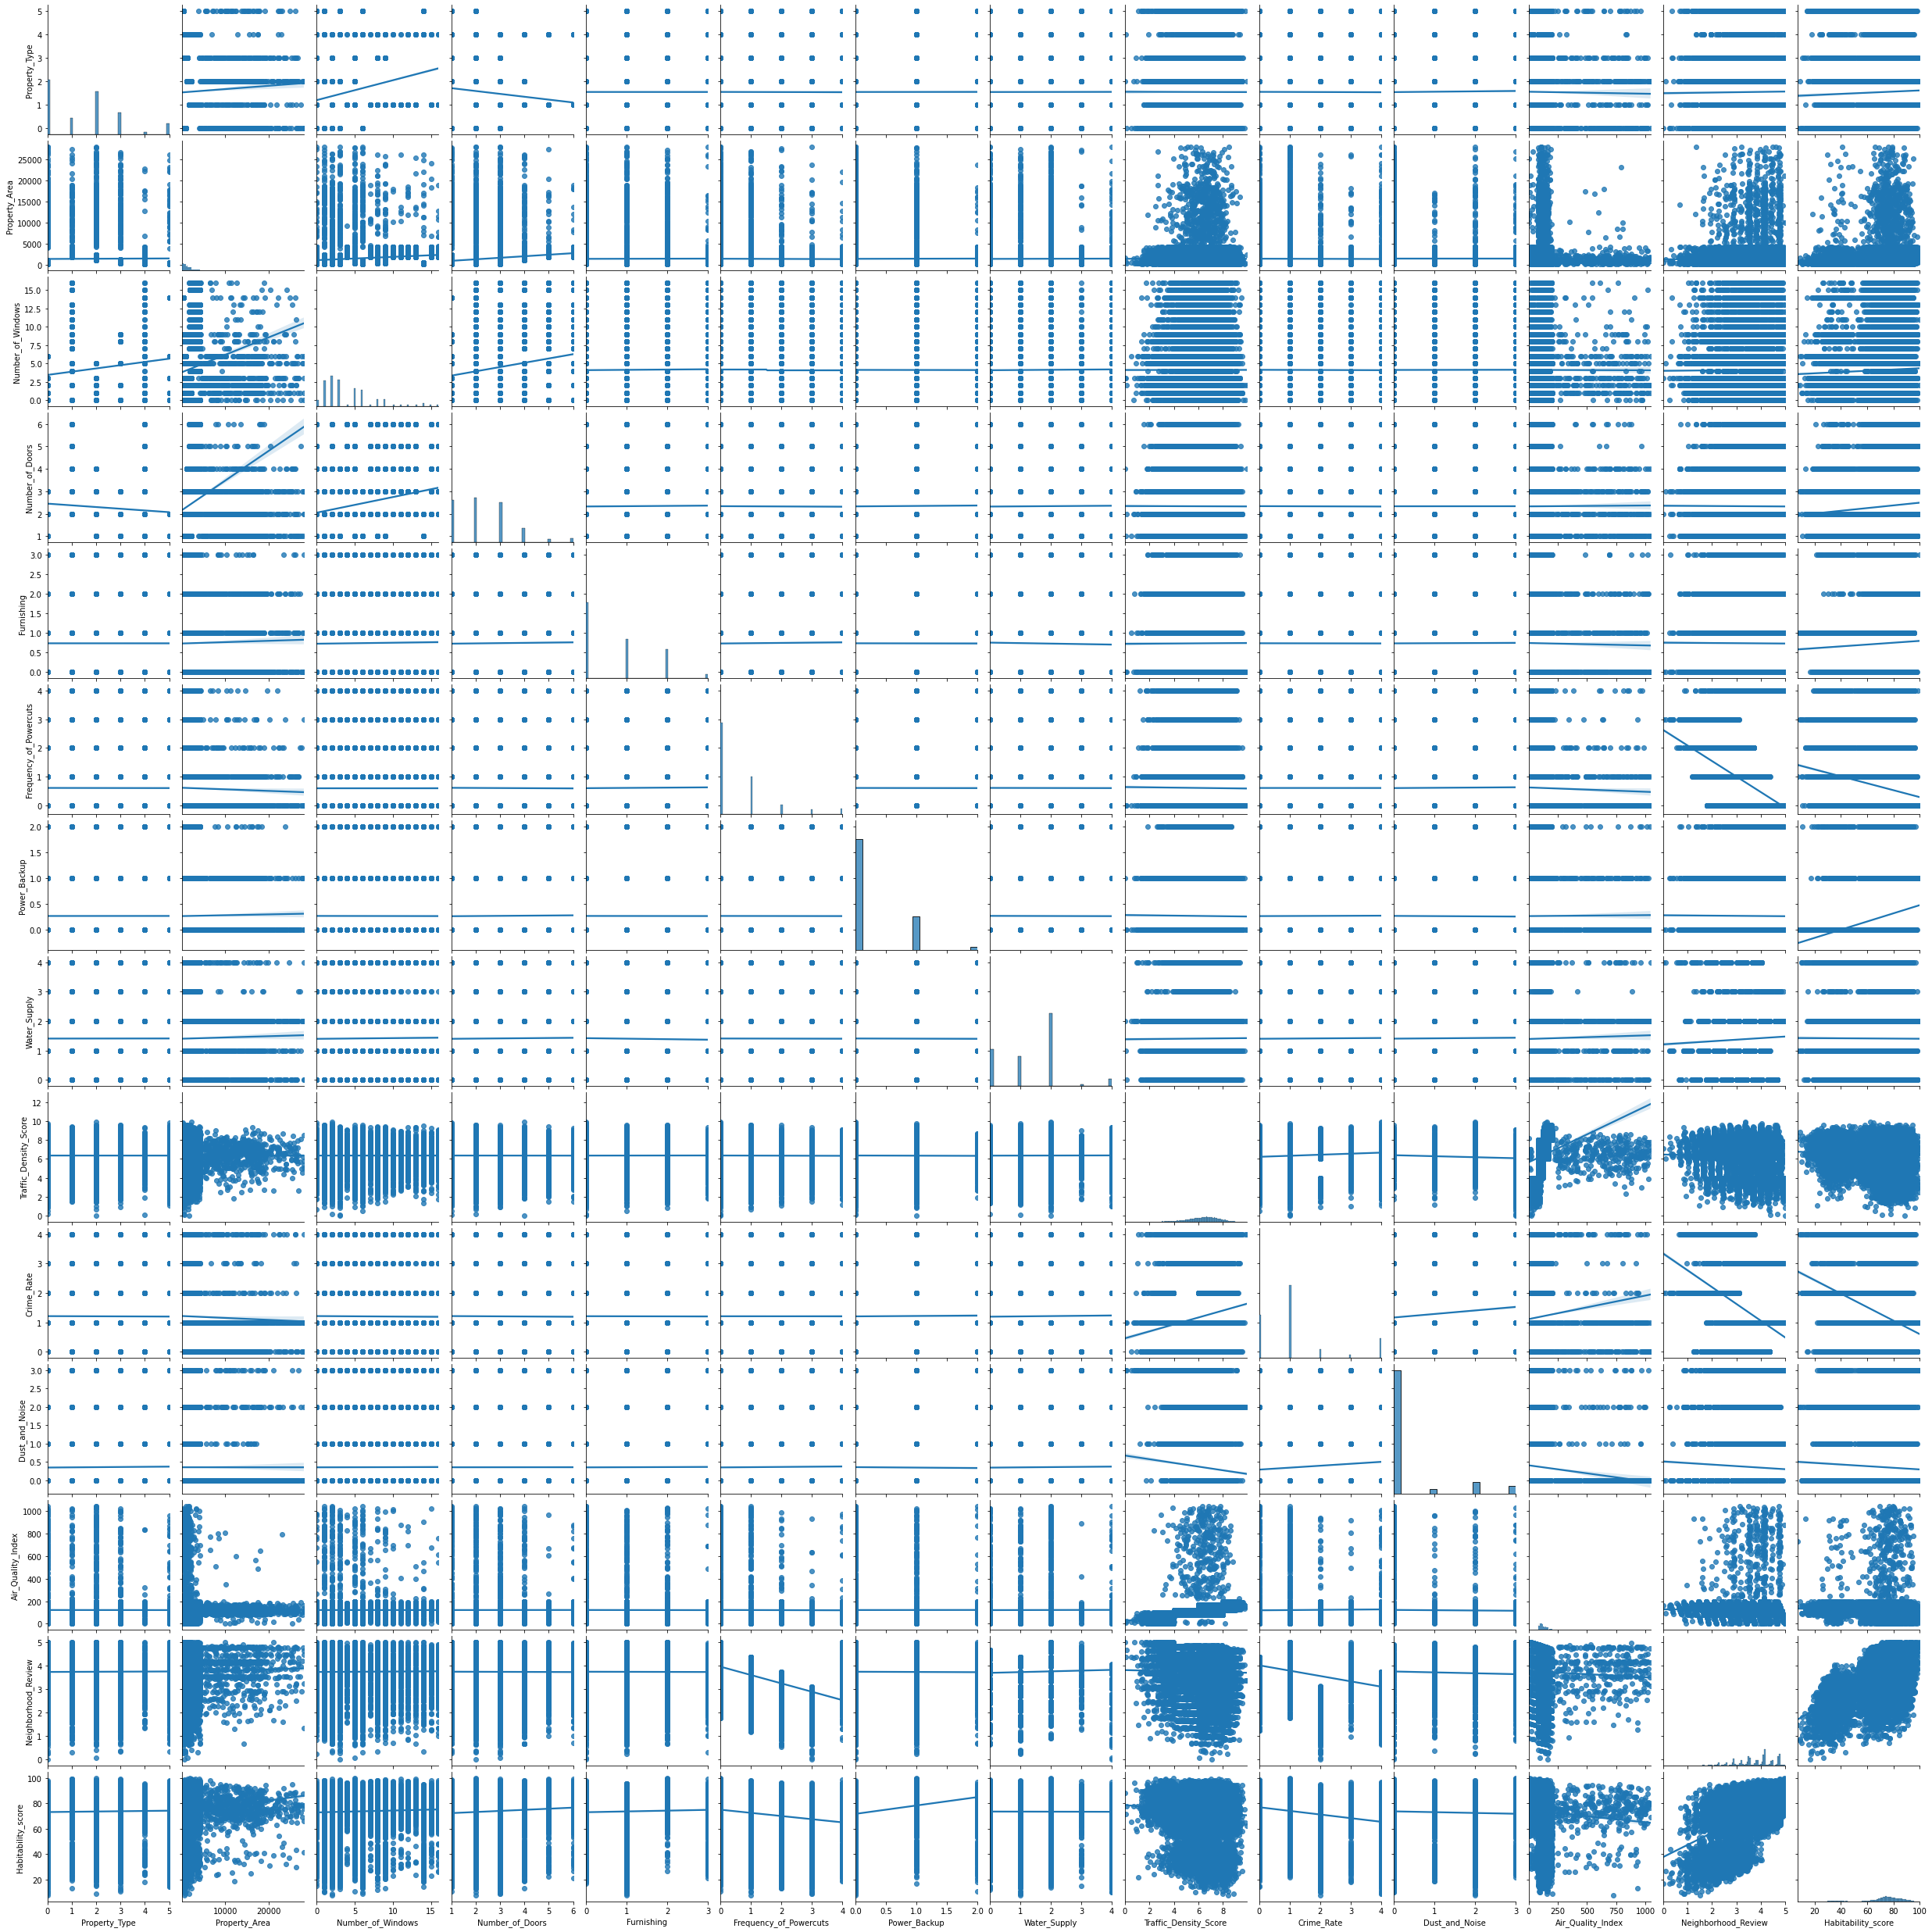

In [110]:
sns.pairplot(train[['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review','Habitability_score' ]], kind="reg")

In [111]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [112]:
col = ['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review']
df = correlation(train[col],0.7)
print(col)
print(list(df.columns))

['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review']
['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review']


In [113]:
train.isna().sum()

Property_ID               0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [114]:
def remove_outliers(df,columns,n_std):
    print(df.shape)
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
    print(df.shape)
    return df

In [115]:
df = remove_outliers(train,['Habitability_score'],1.5)

(39499, 15)
Working on column: Habitability_score
(39212, 15)


## Train_Test_Split

In [116]:
col = ['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review']

In [117]:
#X_train, X_val, y_train, y_val = train_test_split(train[col], train['Habitability_score'], test_size=0.33, random_state=42)

## Custom Matrix

In [118]:
from sklearn.metrics import accuracy_score, make_scorer, r2_score
def my_custom_loss_func(actual, predicted):
    return max( 0, 100*(r2_score(actual , predicted)))
score = make_scorer(my_custom_loss_func, greater_is_better=True)

In [119]:
def get_feature_names(columns, indexes):
    sel_columns = []
    for i in indexes:
        sel_columns.append(columns[i])
    return sel_columns

## Training Model

### 1. LightGBM

#### Feature Selection

In [120]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import lightgbm as lgbm
model = lgbm.LGBMRegressor()

for i in range(3,12):
    print("______________________________________________________ Features Selection number : ",i)
    sfs1 = SFS(model, 
           k_features=i, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring=score,
           cv=5)
    sfs1 = sfs1.fit(train[col], train['Habitability_score'])
    print('model : ',sfs1)
    print('Selected features index : ', sfs1.k_feature_idx_)
    print('Selected features are : ',get_feature_names(col,sfs1.k_feature_idx_))

______________________________________________________ Features Selection number :  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   17.3s finished

[2022-08-02 10:19:37] Features: 12/3 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   15.1s finished

[2022-08-02 10:19:53] Features: 11/3 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   12.7s finished

[2022-08-02 10:20:05] Features: 10/3 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=3,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (4, 6, 12)
Selected features are :  ['Furnishing', 'Power_Backup', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.0s finished

[2022-08-02 10:21:10] Features: 12/4 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.1s finished

[2022-08-02 10:21:23] Features: 11/4 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   12.2s finished

[2022-08-02 10:21:35] Features: 10/4 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=4,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (1, 4, 6, 12)
Selected features are :  ['Property_Area', 'Furnishing', 'Power_Backup', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   19.8s finished

[2022-08-02 10:22:42] Features: 12/5 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   15.6s finished

[2022-08-02 10:22:58] Features: 11/5 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   13.0s finished

[2022-08-02 10:23:11] Features: 10/5 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=5,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (1, 4, 5, 6, 12)
Selected features are :  ['Property_Area', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  6


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   17.1s finished

[2022-08-02 10:24:12] Features: 12/6 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   15.0s finished

[2022-08-02 10:24:27] Features: 11/6 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   13.4s finished

[2022-08-02 10:24:41] Features: 10/6 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=6,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (1, 4, 5, 6, 10, 12)
Selected features are :  ['Property_Area', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Dust_and_Noise', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   17.4s finished

[2022-08-02 10:25:37] Features: 12/7 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.7s finished

[2022-08-02 10:25:51] Features: 11/7 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   11.3s finished

[2022-08-02 10:26:03] Features: 10/7 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=7,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (0, 1, 4, 5, 6, 10, 12)
Selected features are :  ['Property_Type', 'Property_Area', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Dust_and_Noise', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.8s finished

[2022-08-02 10:26:47] Features: 12/8 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.1s finished

[2022-08-02 10:27:00] Features: 11/8 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   12.7s finished

[2022-08-02 10:27:13] Features: 10/8 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=8,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (0, 1, 4, 5, 6, 9, 10, 12)
Selected features are :  ['Property_Type', 'Property_Area', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Crime_Rate', 'Dust_and_Noise', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.9s finished

[2022-08-02 10:27:51] Features: 12/9 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   14.4s finished

[2022-08-02 10:28:05] Features: 11/9 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   12.2s finished

[2022-08-02 10:28:18] Features: 10/9 -- score: 81.2914735352342[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=9,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (0, 1, 3, 4, 5, 6, 9, 10, 12)
Selected features are :  ['Property_Type', 'Property_Area', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Crime_Rate', 'Dust_and_Noise', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.8s finished

[2022-08-02 10:28:46] Features: 12/10 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.0s finished

[2022-08-02 10:28:59] Features: 11/10 -- score: 81.21572918901565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   11.2s finished

[2022-08-02 10:29:10] Features: 10/10 -- score: 81.2914735352342

model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=10,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (0, 1, 3, 4, 5, 6, 7, 9, 10, 12)
Selected features are :  ['Property_Type', 'Property_Area', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise', 'Neighborhood_Review']
______________________________________________________ Features Selection number :  11


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.0s finished

[2022-08-02 10:29:26] Features: 12/11 -- score: 81.13480895867254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


model :  SequentialFeatureSelector(estimator=LGBMRegressor(), forward=False,
                          k_features=11,
                          scoring=make_scorer(my_custom_loss_func), verbose=2)
Selected features index :  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12)
Selected features are :  ['Property_Type', 'Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise', 'Neighborhood_Review']


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.1s finished

[2022-08-02 10:29:40] Features: 11/11 -- score: 81.21572918901565

### 2. XGBoost

#### Feature Selection

In [121]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import xgboost as xg
model = xg.XGBRegressor()

for i in range(3,12):
    print("______________________________________________________ Features Selection number : ",i)
    sfs1 = SFS(model, 
           k_features=i, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring=score,
           cv=5)
    sfs1 = sfs1.fit(train[col], train['Habitability_score'])
    print('model : ',sfs1)
    print('Selected features index : ', sfs1.k_feature_idx_)
    print('Selected features are : ',get_feature_names(col,sfs1.k_feature_idx_))

______________________________________________________ Features Selection number :  3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  1.7min finished

[2022-08-02 10:31:30] Features: 12/3 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.5min finished

[2022-08-02 10:32:57] Features: 11/3 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.2min finished

[2022-08-02 10:34:10] Features: 10/3 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  1.9min finished

[2022-08-02 10:41:00] Features: 12/4 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished

[2022-08-02 10:42:45] Features: 11/4 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.5min finished

[2022-08-02 10:44:12] Features: 10/4 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.1min finished

[2022-08-02 10:51:31] Features: 12/5 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished

[2022-08-02 10:53:11] Features: 11/5 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.5min finished

[2022-08-02 10:54:42] Features: 10/5 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.2min finished

[2022-08-02 11:01:47] Features: 12/6 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished

[2022-08-02 11:03:28] Features: 11/6 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.5min finished

[2022-08-02 11:04:59] Features: 10/6 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.2min finished

[2022-08-02 11:11:32] Features: 12/7 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.9min finished

[2022-08-02 11:13:23] Features: 11/7 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.5min finished

[2022-08-02 11:14:51] Features: 10/7 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.1min finished

[2022-08-02 11:20:36] Features: 12/8 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.8min finished

[2022-08-02 11:22:21] Features: 11/8 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.5min finished

[2022-08-02 11:23:49] Features: 10/8 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.1min finished

[2022-08-02 11:28:38] Features: 12/9 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.8min finished

[2022-08-02 11:30:26] Features: 11/9 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.6min finished

[2022-08-02 11:32:02] Features: 10/9 -- score: 80.62745702946765[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.1min finished

[2022-08-02 11:35:41] Features: 12/10 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished

[2022-08-02 11:37:25] Features: 11/10 -- score: 80.55936948801998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  1.5min finished

[2022-08-02 11:38:55] Features: 10/10 -- score: 80.62745702946765

model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  2.1min finished

[2022-08-02 11:41:10] Features: 12/11 -- score: 80.3400467365399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


model :  SequentialFeatureSelector(estimator=XGBRegressor(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                    

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.7min finished

[2022-08-02 11:42:50] Features: 11/11 -- score: 80.55936948801998